## Bayesian Priors:

Prior can be clasified in the following groups:

### Proper:
    
Finite integral

### Inproper:
    
Infinte integral

We care that the integral of our posterior is finite. When the likelihhod drops to zero is matematically ok to assume an inproper prior. But that have to be true for every realization of your data and its difficult to probe.


$P(B|A) = CP_n(A)P(A|B)$


Ex: 

$y = a + bx$

We can assume:

$P(a) =C_1 $ (constant)

$-\infty<a<\infty$

$P(b) = C_2$ (constant)
$-\infty<b<\infty$

You can assume values and you have to probe how your results change by changing the extreme values.

$A_1<a<A_2$

$B_1<b<B_2$


### Informative:
    
You can start with a prior of whtat you already now, normally from results from previous works. You want to use the information that previous studies have taken, you give weights to that data and make your own prior.

If your prior is very broad and your measurement is narrow basically you are having a constant prior.


### Uninformative (incomplete prior knowledge):

Some times you have partial information for your priors and in some cases you might have no previous knowledge.

#### Discrete:


Ex (taken from Jaynes et al 1968): 

Image the following lattice: 

 x   x   x   x   x   x   x   x   x    x 
 
 We have an impurity in one of the nodes.
 
 -> You identify at what value of j your inpurity is
 measurements suggest that normally the mean value of the position of 
 the inpurity is at:
 
 $<cos(k x_j)> = 0.3$  
 
 What you know:
 $\sum_{j=1} P(j)=1$   
 $0\leq P(j)$
 $\sum_{j=1} P(j)cos(k x_j)=0.3$   
 
 this goes back to Shanon information theory.
 
 The entropy of information
 $H=-\sum_j P(j)log(P(j))$ ->if $log=log_{10}$ Shanon.
 
 I would choose the distribtuion that have the lease ammount of information which is that one in more entropy.
 
 Ex: A coin
 
 The probablity to have a tail is:
 $tail = 1-p$
 

 
 $H=-plog(p) -(1-p)log(1-p)$
 
 If the coin always give you tails p=0 the entripy is zero beacuse there is an infinte ammount of information (the eystem is reprodusable). p=0.5 is when you equal chance to have heads and tails the entropy is maximum.
 







In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


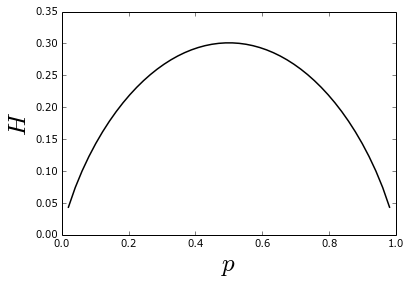

In [4]:
p = linspace(0.0, 1)
H = -p*log10(p) - (1-p)*log10(1-p)

plot(p, H, lw=1.5, c='k')
xlabel('$p$', fontsize=25)
ylabel('$H$', fontsize=25)

Entropy:

$<cos(kx_j> = \dfrac{\partial }{\partial \lambda} ln(Z(\lambda))$

Maximizing the entropy we found:

$P(j)= \dfrac{1}{Z(\lambda)}exp(\lambda cos(kx_j)$

$Z(\lambda) = \sum exp(\lambda cos(kx_j)$

$\lambda:$ Lagrange multipliers


For a continious way to do it see (put the reference)

Gaussian distributions (with no uncertainty) is the least that give you the maximize of entropy.

(in case you just know the mean and uncertainty of a measuremnt)


#### No prior knowledge (If you know nothing or you choose to ignore everything)

for discrete data:
Imagine I have a coin bellow 3 glasses labeled as:

A   B  C


We follow the invariance principle to extra priors.

If I change tha labeles A, B and C, there should make no difference in the result

$P(A) = P(B) = P(C)$

$P(A) + P(B) + P(C) = 1$

$P(A) = P(B) = P(C) = 1/3$

$P(x_j) = 1/N$


$P_pr(a) = C_1$
$P_pr(b) = C_2$

The origin of coordinates and my units should not affect the result of my posterior.


If I assume:

$a' = a + a_0$  -> Location

$b' = b * b_0$ -> Scale

$y = a + a_0 + (b* b_0)x$



$P(a, b| data) = P_{pr}(a) P_{pr}(b) P(data|a, b)$

$P(a', b'| data) = P_{pr}(a') P_{pr}(b') P(data|a', b')$

I would assume $P(data|a, b) =  P(data|a', b')$ (no matter units and scale)

Transfomration invariace

$P(a' b'|data)da'db' = P(a, b|data)dadb$

$P(a' b'|data) = P(a, b|data) J(a a' b b')$ -> Jacobian transformation

$P(a' b'|data) = P(a, b|data) 1/b_0$

$P_{pr}(a') P_{pr}(b') P(data|a', b') = P_{pr}(a) P_{pr}(b) P(a, b|data) b/b_0$

$\dfrac{P_{pr}(a)}{P_{pr}(a')} = \dfrac{P_{pr}(b)b}{P_{pr}(b')b'} = C$ -> Constant

$P_{pr}(a) = C_1$

$P_{pr}(b) = C_2/b$

This is call tranformation group priors (Jeffreys Prior)

This also says that the frequentis approach if going to depend in the units we are using.

This procedure is not correct beacuse this might dependet in rotations.



Now lets see how this affect the result of last class

In [15]:
N_points = 100.0
x4 = np.linspace(1, 4, N_points)
y4 = 1 + 2*x4

x5 = np.linspace(1, 4, N_points)
y5 = 1 + 2*x4

dx = np.zeros(N_points)
dy = np.zeros(N_points)
dx2 = np.zeros(N_points)
dy2 = np.zeros(N_points)

for i in range(len(x4)):
    dx[i] = np.random.normal(0, 0.05, 1)
    dy[i] = np.random.normal(0, 0.05, 1)
    dx2[i] = np.random.normal(0, 1.0, 1)
    dy2[i] = np.random.normal(0, 1.0, 1)
    x4[i] += dx[i]
    y4[i] += dy[i]
    x5[i] += dx2[i]
    y5[i] += dy2[i]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


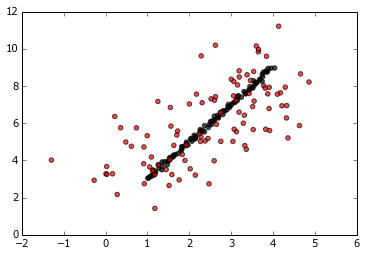

In [16]:
scatter(x4, y4, c='k', alpha=0.7)
scatter(x5, y5, c='r', alpha=0.7)

In [17]:
#Case1   Pr(a) = C_1 & Pr(a) = C_2  -> constant priors
#Case1   Pr(a) = C_1 & Pr(a) = C_2/b -> 1 prior goes as 1/b (b: the slope)

# Function that evaluates the likelihood
def likelihood(x_i, y_i, a, b, sigmax_i, sigmay_i):
    L = -0.5 * np.sum((y_i - a - b*x_i)**2.0/(sigmay_i**2.0 + b**2.0*sigmax_i**2.0))
    return L


In [19]:
# Making my grid of likelihoods!

N_P = 1000.0
L4 = np.zeros([N_P, N_P])
L5 = np.zeros([N_P, N_P])
A = np.linspace(0.5, 1.5, N_P)
B = np.linspace(1.5, 2.5, N_P)

for i in range(len(A)):
    for j in range(len(B)):
        L4[i][j] = likelihood(x4, y4, A[i], B[j], 0.05, 0.05)
        L5[i][j] = likelihood(x5, y5, A[i], B[j], 1.0, 1.0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<matplotlib.colorbar.Colorbar instance at 0x7fc447131e18>

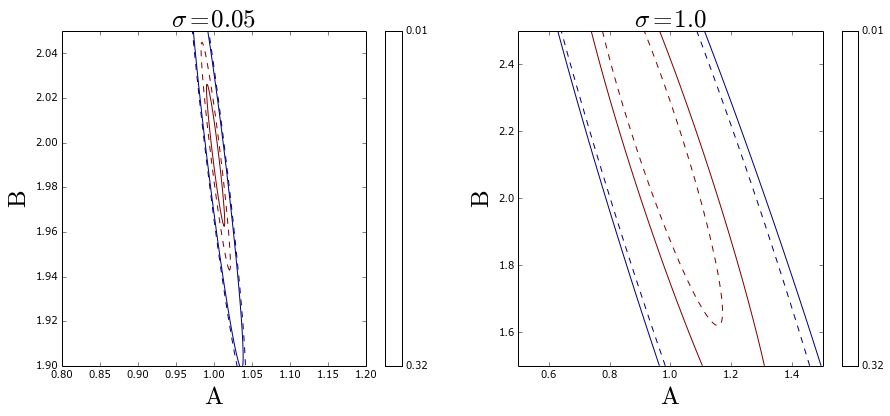

In [26]:
#Plotting the likelihoods
figure(figsize=(15, 6))
subplot(1, 2, 1)
levels = [0.32, 0.01]
contour(A, B, np.exp(L4-np.max(L4)), 10, linestyles='dashed', levels=levels)
contour(A, B, np.exp(L4-np.max(L4))/B, 10, levels=levels)
#imshow(np.exp(L4-np.max(L4)), origin='lower', extent=[0.8, 1.2, 1.9, 2.05])
xlabel('$\mathrm{A}$', fontsize=25)
ylabel('$\mathrm{B}$', fontsize=25)
colorbar()
title('$\sigma=0.05$', fontsize=25)
xlim(0.8, 1.2)
ylim(1.9, 2.05)

subplot(1, 2, 2)
title('$\sigma=1.0$', fontsize=25)
contour(A, B, np.exp(L5-np.max(L5))/B, 10, levels=levels, linestyles='dashed')
contour(A, B, np.exp(L5-np.max(L5)), 10, levels=levels)

#imshow(np.exp(L4-np.max(L4)), origin='lower', extent=[0.8, 1.2, 1.9, 2.05])
xlabel('$\mathrm{A}$', fontsize=25)
ylabel('$\mathrm{B}$', fontsize=25)
colorbar()
# Note: The results are very similar but not the same, 
#if the dispersion is larges than 0.05 the effects would be larger.

In [63]:
N_P = 1000.0
x = linspace(-100, 100)
L6 = np.zeros([N_P, N_P])
L7 = np.zeros([N_P, N_P])
A = np.linspace(-100, 100, N_P)
B = np.linspace(-100, 100, N_P)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Why a prior that goes as 1/b is not enough? 
see plot below and explanation

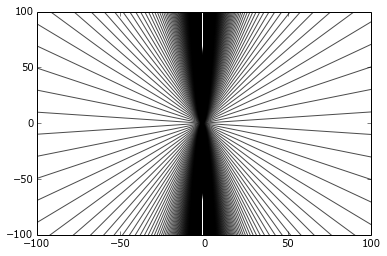

In [69]:
for i in range(len(A)):
    plot(x, A[i]+x*B[i], lw=1.0, alpha=0.7, c='k')
    xlim(-100, 100)
    ylim(-100, 100)
    #axis('equal')

This is beacuse we are making a uniform prior in b becasue $b=tan(\theta)$ the tangent function makes 
that must of the valius are close to $\theta = \pm \pi/2$ 

this matter when you data line tends to be vertical

$a_{per} = a cos(theta)$ -> $a_{per}$ is the distance from the origin to a place in the line where the angle is perpendicular to the line

$b = tan(\theta)$


$y = \dfrac{a_{per}}{cos(\theta)} + atan(\theta) x$

$\theta = a tan(b)$

$a_{per} = a \dfrac{\pm 1}{\sqrt{1 + tan^2{\theta}}} = \dfrac{a}{\sqrt{1+b^2}}$

$P_{pr}(a, b) dadb = P_{pr}(a_{per}, \theta) d\theta da_{per}$

$P_{pr}(a, b) = C \dfrac{1}{1+b^2} \dfrac{1}{(1+b^2)^{1/2}}$


$P_{pr}(a, b) = \dfrac{C}{(1+b^2)^{3/2}}$

<matplotlib.colorbar.Colorbar instance at 0x7fc446e7cd88>

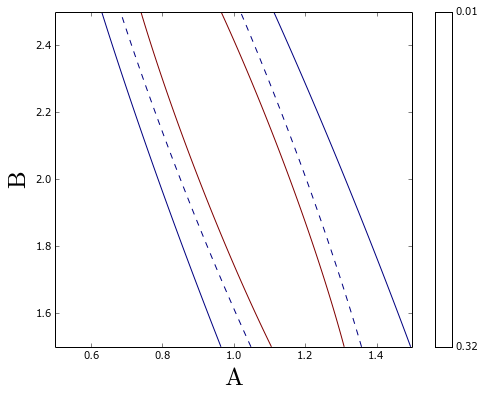

In [29]:
figure(figsize=(8, 6))
levels = [0.32, 0.01]
contour(A, B, np.exp(L5-np.max(L5))/(1+B**2)**(3.0/2.0),  levels=levels, linestyles='dashed')
contour(A, B, np.exp(L5-np.max(L5)),  levels=levels)

#imshow(np.exp(L4-np.max(L4)), origin='lower', extent=[0.8, 1.2, 1.9, 2.05])
xlabel('$\mathrm{A}$', fontsize=25)
ylabel('$\mathrm{B}$', fontsize=25)
colorbar()
#xlim(1.4, 1.6)
#ylim(1.9, 2.05)